In [0]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
datafile = 'bitcoin.csv'
prices = pd.read_csv(datafile, index_col=0)

# data originally in reverse cronological order
#   so correct by reversing the rows
prices = prices[::-1]

print(prices[:10])
print(prices[-10:])

                Open    High     Low   Close Volume     Market Cap
Date                                                              
Apr 28, 2013  135.30  135.98  132.10  134.21      -  1,500,520,000
Apr 29, 2013  134.44  147.49  134.00  144.54      -  1,491,160,000
Apr 30, 2013  144.00  146.93  134.05  139.00      -  1,597,780,000
May 01, 2013  139.00  139.89  107.72  116.99      -  1,542,820,000
May 02, 2013  116.38  125.60   92.28  105.21      -  1,292,190,000
May 03, 2013  106.25  108.13   79.10   97.75      -  1,180,070,000
May 04, 2013   98.10  115.00   92.50  112.50      -  1,089,890,000
May 05, 2013  112.90  118.80  107.14  115.91      -  1,254,760,000
May 06, 2013  115.98  124.66  106.64  112.30      -  1,289,470,000
May 07, 2013  112.25  113.44   97.70  111.50      -  1,248,470,000
                 Open     High      Low    Close         Volume      Market Cap
Date                                                                           
Jul 29, 2017  2807.02  2808.76  2692

In [19]:

def naive_preparation(dataframe):
  ''' Naive implementation of cleaning this dataset '''

  # remove the volumn column since it contains null values
  new_dataframe = dataframe.drop(columns=['Volume'])

  # 'Market Cap' column contains strings with commas
  #   remove commas and convert each entry to int
  market_cap_column = new_dataframe['Market Cap']
  new_dataframe['Market Cap'] = [int(market_cap.replace(',', '')) \
                                 for market_cap in market_cap_column]
  return new_dataframe

prices_dataframe = naive_preparation(prices)
print(prices_dataframe.head())
print(prices_dataframe.shape)


                Open    High     Low   Close  Market Cap
Date                                                    
Apr 28, 2013  135.30  135.98  132.10  134.21  1500520000
Apr 29, 2013  134.44  147.49  134.00  144.54  1491160000
Apr 30, 2013  144.00  146.93  134.05  139.00  1597780000
May 01, 2013  139.00  139.89  107.72  116.99  1542820000
May 02, 2013  116.38  125.60   92.28  105.21  1292190000
(1563, 5)


Text(0.5, 1.0, 'Opening Price of Bitcoin for Each Day')

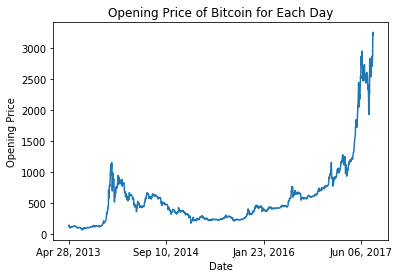

In [20]:

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
plt.plot(prices_dataframe['Open'])
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.title('Opening Price of Bitcoin for Each Day')


In [23]:
# scalers to normalize data
prices_scaler = MinMaxScaler(feature_range=(0, 1))
market_cap_scaler = MinMaxScaler(feature_range=(0, 1))


values = prices_dataframe.values
print(values)
print(values.shape)


[[1.35300e+02 1.35980e+02 1.32100e+02 1.34210e+02 1.50052e+09]
 [1.34440e+02 1.47490e+02 1.34000e+02 1.44540e+02 1.49116e+09]
 [1.44000e+02 1.46930e+02 1.34050e+02 1.39000e+02 1.59778e+09]
 ...
 [2.89763e+03 3.29001e+03 2.87483e+03 3.25291e+03 4.77782e+10]
 [3.25761e+03 3.29329e+03 3.15560e+03 3.21394e+03 5.37209e+10]
 [3.21278e+03 3.39768e+03 3.18089e+03 3.37894e+03 5.29873e+10]]
(1563, 5)


In [29]:
# reshape to (-1, 1) since that's what is expected for MinMaxScaler
prices = values[:, :-1].reshape(-1, 1)
market_cap = values[:, -1].reshape(-1, 1)

prices_values_shape = values[:, :-1].shape

# necessary to reshape prices_values since 
values[:, :-1] = prices_scaler.fit_transform(prices).reshape(prices_values_shape)
values[:, -1] = market_cap_scaler.fit_transform(market_cap).flatten()

# x and y are the input and output for machine learning model
x = values[:-1]
y = values[1:, 0]

print('Printing x[:10]:')
print(x[:10])
print('Printing y[:10]:')
print(y[:10])


Printing x[:10]:
[[0.02093843 0.02114251 0.01997809 0.02061132 0.01362377]
 [0.02068034 0.02459673 0.02054829 0.02371142 0.01344698]
 [0.02354936 0.02442867 0.0205633  0.02204883 0.01546089]
 [0.02204883 0.02231592 0.01266149 0.01544348 0.01442277]
 [0.01526042 0.0180274  0.00802785 0.01190823 0.00968869]
 [0.01222034 0.01278454 0.00407245 0.00966943 0.00757088]
 [0.00977447 0.01484627 0.00809387 0.014096   0.0058675 ]
 [0.01421605 0.01598668 0.01248743 0.01511937 0.00898168]
 [0.01514037 0.0177453  0.01233738 0.01403598 0.00963731]
 [0.01402098 0.0143781  0.00965443 0.0137959  0.00886287]]
Printing y[:10]:
[0.02068034 0.02354936 0.02204883 0.01526042 0.01222034 0.00977447
 0.01421605 0.01514037 0.01402098 0.0132257 ]


In [31]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, \
                                                    random_state=42)

# reshape to properly feed into machine learning model
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], 1)
train_y = train_y.reshape(train_y.shape[0], 1)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], 1)
test_y = test_y.reshape(test_y.shape[0], 1)

print('Printing train_x:')
print(train_x)
print('Printing train_y:')
print(train_y)


Printing train_x:
[[[0.15372057]
  [0.15458188]
  [0.15345348]
  [0.15429077]
  [0.15805922]]

 [[0.16335999]
  [0.16367811]
  [0.16287982]
  [0.16316792]
  [0.16816072]]

 [[0.0490134 ]
  [0.04944555]
  [0.04898939]
  [0.04927149]
  [0.04692213]]

 ...

 [[0.04941854]
  [0.05120118]
  [0.04919046]
  [0.05086506]
  [0.04866141]]

 [[0.36026589]
  [0.36892097]
  [0.36024789]
  [0.3647945 ]
  [0.37491553]]

 [[0.12229341]
  [0.14043185]
  [0.12219438]
  [0.13940249]
  [0.12459993]]]
Printing train_y:
[[0.15423075]
 [0.16317393]
 [0.04927149]
 ...
 [0.05082004]
 [0.36503459]
 [0.13863422]]


Short Explanation for LSTM vs Feed Forward Neural Netword

Ex. Predicting the characters for string in "hello". \
x = 'hell'\
y = 'ello' \
h -> e \
e -> l \
l -> l \
l -> o \
Note that the predicted value for second 'l' is different from the first one since the LSTM noticed context while a typical Artificial Neural Network will predict the same for input 'l'.



In [32]:
# the input shape is the shape of train_x not including the number of samples
#   dimension
input_shape = train_x.shape[1:]

# create a model
model = tf.keras.Sequential([
  tf.keras.layers.LSTM(16, input_shape=input_shape, activation='tanh'),
  tf.keras.layers.Dense(1)])

model.compile('rmsprop', loss='mse')

print(model.summary())


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                1152      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
model.fit(train_x, train_y, epochs=20, batch_size=128)

preds = model.predict(test_x)

print(prices_scaler.inverse_transform(preds)[:10])
print(prices_scaler.inverse_transform(test_y)[:10])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1249 samples
Epoch 1/20
1249/1249 [==============================] - 1s 1ms/sample - loss: 0.0268
Epoch 2/20
1249/1249 [==============================] - 0s 43us/sample - loss: 0.0129
Epoch 3/20
1249/1249 [==============================] - 0s 43us/sample - loss: 0.0082
Epoch 4/20
1249/1249 [==============================] - 0s 43us/sample - loss: 0.0054
Epoch 5/20
1249/1249 [==============================] - 0s 60us/sample - loss: 0.0029
Epoch 6/20
1249/1249 [==============================] - 0s 50us/sample - loss: 0.0011
Epoch 7/20
1249/1249 [==============================] - 0s 53us/sample - loss: 3.3069e-04
Epoch 8/20
1249/1249 [==============================] - 0s 58us/sample - loss: 1.6675e-04
Epoch 9/20
1249/1249 [==============================] - 0s 46us/sample - loss: 1.7055e-04
Epoch 10/20
1249/1249 [==============================] - 0s 46us/sample - loss: 1.4731e-04
Epoch 11